In [27]:
# knihovna matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# knihovna seaborn
import seaborn as sns


In [28]:
titanic_train = pd.read_csv('./train.csv', engine="python")
titanic_train = pd.concat([titanic_train, pd.get_dummies(titanic_train["Sex"]), 
                      pd.get_dummies(titanic_train["Embarked"])], axis=1)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,True,True,False,False


In [29]:
# Zjistíme něco o datech
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

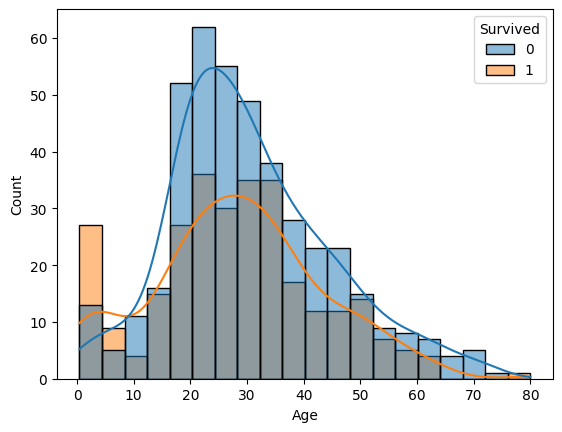

In [30]:
sns.histplot(data=titanic_train, x="Age", hue="Survived",kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

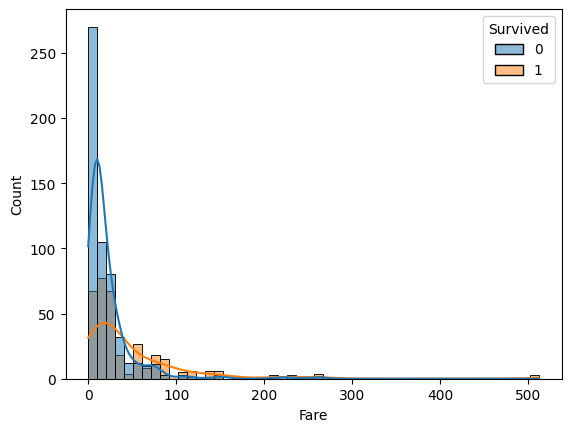

In [31]:
# U mladých lidí (do cca 8ti let) byla malá úmrtnost

titanic_train["Child"] = (titanic_train["Age"] < 9)

sns.histplot(data=titanic_train, x="Fare", hue="Survived", kde=True,bins=50)

In [32]:
# Vztah mezi délkou cesty a počtem přeživších
# V datasetu chybí data, zjistím v jakých sloupcích

titanic_train["Long_fare"] = (titanic_train["Fare"] > 70)

titanic_train.columns[titanic_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [33]:
# Z těchto sloupců mě zajímá pouze Age
# Doplním chybějící data - průměrný věk byl okolo 30 let

titanic_train["Age"] = titanic_train["Age"].fillna(30) 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x = np.array(titanic_train[["Pclass", "male", "female", "Age", "Child", "SibSp", "Parch","Long_fare", "Fare", "S", "Q", "C"]]).reshape((-1, 12))
y = np.array(titanic_train["Survived"])

x_ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error

model_1 = LinearRegression().fit(x_train, y_train)
y_pred = model_1.predict(x_test)
mean_squared_error(y_test, y_pred)

0.13763991218060861

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

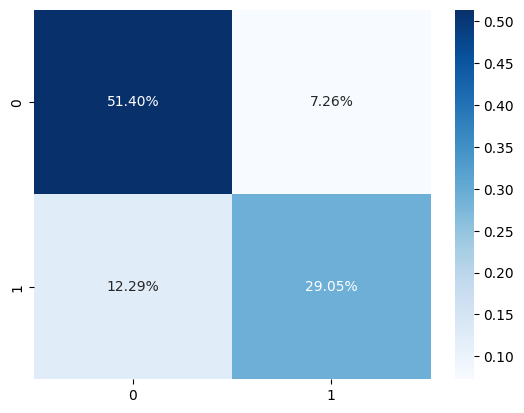

In [36]:
# MSE je docela nízký
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix = confusion_matrix(y_test, np.where(model_1.predict(x_test) > 0.5, 1, 0))
print(classification_report(y_test, np.where(model_1.predict(x_test) > 0.5, 1, 0)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [37]:
model_2 = LogisticRegression(solver='liblinear').fit(x_train, y_train)
y_pred = model_2.predict(x_test)
mean_squared_error(y_test, y_pred)

0.20670391061452514

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<Axes: >

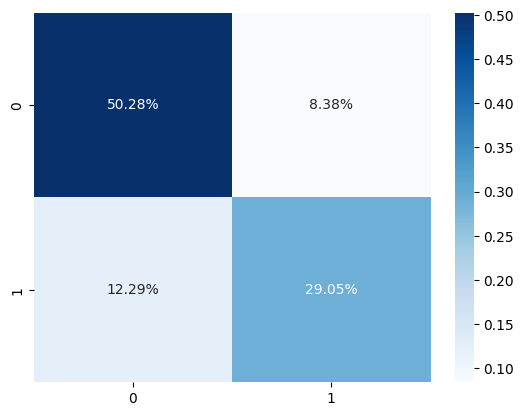

In [38]:
# MSE je o něco horší
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix = confusion_matrix(y_test, model_2.predict(x_test))
print(classification_report(y_test, model_2.predict(x_test)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [39]:
# výsledek je asi trochu lepší